### Multiple Linear Regression (prediction model for profit) Using Statesodel  

#### Importing Libearies 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt 

#### Importing Dataset 

In [2]:
data = pd.read_csv("F://Data_Set/50_Startups.csv")   

In [3]:
data.head() 

,R_DSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New_York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New_York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Dataset information 

In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   R_DSpend        50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Check any Null Value is Present in the Dataset or Not 

In [5]:
data.isnull().sum() 

R_DSpend          0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

#### Correlation 

In [6]:
data.corr() 

,R_DSpend,Administration,MarketingSpend,Profit
R_DSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


#### Scatter Plot Between Variables along with Histogram 

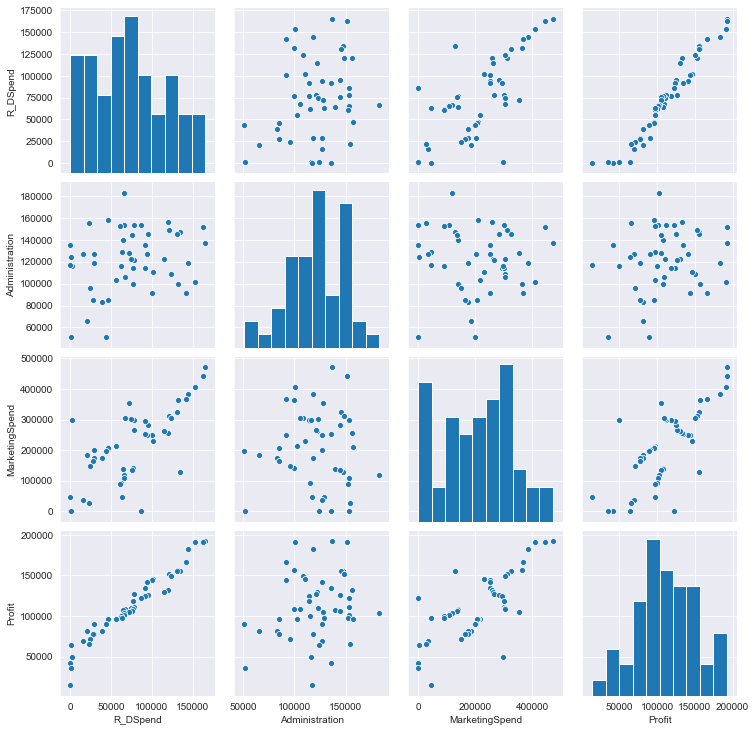

In [7]:
sns.set_style(style='darkgrid')

sns.pairplot(data)   

#### 1st Model Genration 

In [11]:
dataset_1 = data 

In [12]:
dataset_1.drop('State',axis=1,inplace=True) 

1st Model Genration 

In [13]:
model_1 = smf.ols('Profit~R_DSpend+Administration+MarketingSpend',data=dataset_1).fit()  

Coefficent

In [14]:
model_1.params 

Intercept         50122.192990
R_DSpend              0.805715
Administration       -0.026816
MarketingSpend        0.027228
dtype: float64

#### Residual Analysis 

Test for Normality of Residuals (Q-Q Plot) of 1st Model

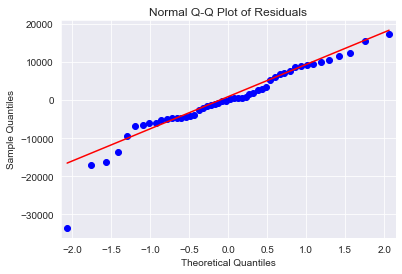

In [15]:
import statsmodels.api as sm 
qqplot = sm.qqplot(model_1.resid,line='q') 
plt.title('Normal Q-Q Plot of Residuals')
plt.show() 

#### Predict of 1st Model 

In [16]:
New_Data = pd.DataFrame({'R_DSpend':145780.20,'Administration':119411.45,
                         'MarketingSpend':367540.38},index=[1])  

In [19]:
New_Data 

,R_DSpend,Administration,MarketingSpend
1,145780.2,119411.45,367540.38


In [17]:
y1_pred = model_1.predict(New_Data) 

In [18]:
y1_pred 

1    174384.773724
dtype: float64

Summary of 1st model 

In [25]:
model_1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 26 Dec 2020   Prob (F-statistic):           4.53e-30
Time:                        20:26:32   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R_DSpend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MarketingSpend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2nd Model Genration by Using log Transformation on the dataset 

In [26]:
dataset_2 = data 

Log Transformation on the Dataset 

In [43]:
dataset_2['R_DSpend'] = np.log(dataset_2['R_DSpend']+1) 
dataset_2['Administration'] = np.log(dataset_2['Administration']+1)
dataset_2['MarketingSpend'] = np.log(dataset_2['MarketingSpend']+1) 
dataset_2['Profit'] = np.log(dataset_2['Profit']+1)  

#### Fitting 2nd Multiple Linear Regression Model on Log Transformed Dataset 

In [44]:
model_2 = smf.ols('Profit~R_DSpend+Administration+MarketingSpend',data=dataset_2).fit() 

Test for Normality of Residuals (Q-Q Plot) of 2nd Model  

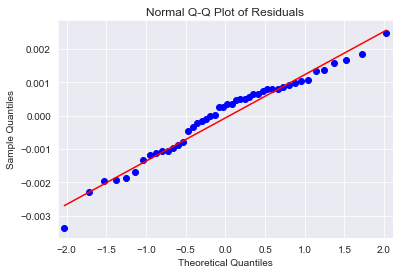

In [74]:
qqplot = sm.qqplot(model_2.resid,line='q') 
plt.title('Normal Q-Q Plot of Residuals')
plt.show() 

Summary of 2nd Model 

In [45]:
model_2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     17.63
Date:                Sat, 26 Dec 2020   Prob (F-statistic):           1.47e-07
Time:                        20:44:58   Log-Likelihood:                 243.46
No. Observations:                  46   AIC:                            -478.9
Df Residuals:                      42   BIC:                            -471.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0948      0.394     -0.241      0.811      -0.889       0.700
R_DSpend          -0.5510      0.120     -4.577      0.000      -0.794      -0.308
Administration     0.9973      0.829      1.203      0.236      -0.675       2.670
MarketingSpend    -0.0756      0.099     -0.766      0.448      -0.275       0.124
==============================================================================
Omnibus:                        2.610   Durbin-Watson:                   0.766
Prob(Omnibus):                  0.271   Jarque-Bera (JB):                2.185
Skew:                          -0.532   Prob(JB):                        0.335
Kurtosis:                       2.919   Cond. No.                     6.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3rd Model Genration by Using Reciprocal Transformation on the dataset 

In [36]:
dataset_3 = data 

#### Reciprocal Transformation on the Dataset 

In [40]:
dataset_3['R_DSpend'] = 1/(dataset_3['R_DSpend']+1) 
dataset_3['Administration'] = 1/(dataset_3['Administration']+1) 
dataset_3['MarketingSpend'] = 1/(dataset_3['MarketingSpend']+1) 
dataset_3['Profit'] = 1/(dataset_3['Profit']+1) 

#### Fitting 3rd Multiple linear Regression Model on Reciprocal Transformed Data

In [41]:
model_3 = smf.ols('Profit~R_DSpend+Administration+MarketingSpend',data=dataset_3).fit() 

Test for Normality of Residuals (Q-Q Plot) of 3rd Model 

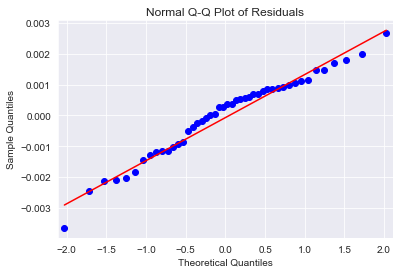

In [72]:
qqplot = sm.qqplot(model_3.resid,line='q') 
plt.title('Normal Q-Q Plot of Residuals')
plt.show() 

Summary of 3rd Model 

In [42]:
model_3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     17.79
Date:                Sat, 26 Dec 2020   Prob (F-statistic):           1.33e-07
Time:                        20:43:55   Log-Likelihood:                 240.05
No. Observations:                  46   AIC:                            -472.1
Df Residuals:                      42   BIC:                            -464.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0665      0.338     -0.196      0.845      -0.749       0.616
R_DSpend          -0.3753      0.082     -4.599      0.000      -0.540      -0.211
Administration     0.6699      0.556      1.204      0.235      -0.453       1.793
MarketingSpend    -0.0466      0.060     -0.775      0.443      -0.168       0.075
==============================================================================
Omnibus:                        2.668   Durbin-Watson:                   0.771
Prob(Omnibus):                  0.263   Jarque-Bera (JB):                2.215
Skew:                          -0.537   Prob(JB):                        0.330
Kurtosis:                       2.938   Cond. No.                     4.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""